# Pyber Ride Sharing

### Analysis
1. The number of total rides tends to increase progressively according to increased the popularity.
2. The average fare in Rural cities has high variance (but I couldn't get variance from data...).
3. The driver number in Urban cities accounts for 86% of total, but fares and rides number remain 62% and 67.5%, respectively. It indicates that income per driver in urban cities would be less than others. 

In [95]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# read data
cityData = pd.read_csv("raw_data/city_data.csv")
rideData = pd.read_csv("raw_data/ride_data.csv")

# merge data
city_ride = pd.merge(cityData, rideData, how="left", on=["city", "city"])

# city_ride[city_ride["city"]=="Sarabury"].head()

## Bubble Plot of Ride Sharing Data

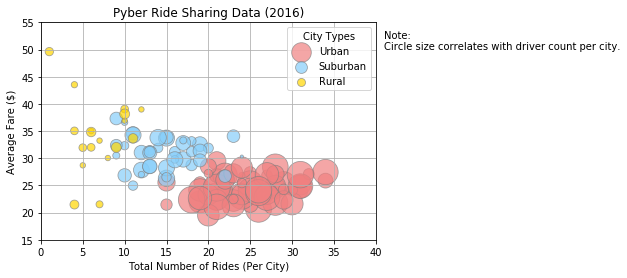

In [96]:
# assign each parameters
urban = city_ride[city_ride["type"] == "Urban"]
urban_rideCount = urban.groupby(["city"])["ride_id"].count()
urban_avgFare = urban.groupby(["city"])["fare"].mean()
urban_driverCount = urban.groupby(["city"])["driver_count"].mean()

suburban = city_ride[city_ride["type"] == "Suburban"]
suburban_rideCount = suburban.groupby(["city"])["ride_id"].count()
suburban_avgFare = suburban.groupby(["city"])["fare"].mean()
suburban_driverCount = suburban.groupby(["city"])["driver_count"].mean()

rural = city_ride[city_ride["type"] == "Rural"]
rural_rideCount = rural.groupby(["city"])["ride_id"].count()
rural_avgFare = rural.groupby(["city"])["fare"].mean()
rural_driverCount = rural.groupby(["city"])["driver_count"].mean()

# create scatter chart
# I'm not sure how to set the grid to the most behind...
plt.grid(True)
plt.scatter(
    urban_rideCount, 
    urban_avgFare, 
    s=10*urban_driverCount,
    alpha=0.7,
    c="lightcoral", 
    edgecolor="gray", 
    label="Urban",
    linewidths = 0.8
)

plt.scatter(
    suburban_rideCount, 
    suburban_avgFare, 
    s=10*suburban_driverCount,
    alpha=0.7,
    c="lightskyblue", 
    edgecolor="gray", 
    label="Suburban",
    linewidths = 0.8
)

plt.scatter(
    rural_rideCount, 
    rural_avgFare, 
    s=10*rural_driverCount,
    alpha=0.7,
    c="gold", 
    edgecolor="gray", 
    label="Rural",
    linewidths = 0.8
)

# graph settings
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim((0,40))
plt.ylim((15,55))

plt.legend(
    loc="best",
    title="City Types"
)

plt.text(41, 50, "Note:\nCircle size correlates with driver count per city.")

plt.show()

## Total Fares by City Type

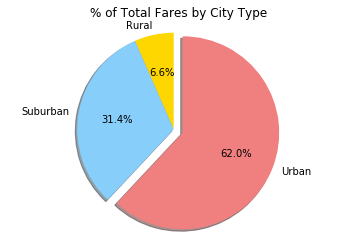

In [97]:
# calculate each ratio
type_percents = city_ride.groupby(["type"])["fare"].sum() / city_ride["fare"].sum()

# create Pie Chart
plt.pie(
    type_percents, 
    labels=["Rural", "Suburban", "Urban"], 
    colors=["gold", "lightskyblue", "lightcoral"], 
    explode=[0, 0, 0.1], 
    autopct='%1.1f%%', 
    shadow=True,
    startangle = 90
)

# graph settings
plt.title("% of Total Fares by City Type")
plt.axis('equal')

plt.show()

## Total Rides by City Type

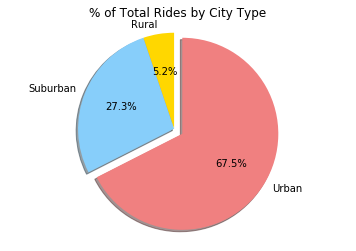

In [98]:
# calculate each ratio
type_percents = city_ride.groupby(["type"])["ride_id"].count() / city_ride["ride_id"].count()

# create Pie Chart
plt.pie(
    type_percents, 
    labels=["Rural", "Suburban", "Urban"], 
    colors=["gold", "lightskyblue", "lightcoral"], 
    explode=[0, 0, 0.1], 
    autopct='%1.1f%%', 
    shadow=True,
    startangle = 90
)

# graph settings
plt.title("% of Total Rides by City Type")
plt.axis('equal')

plt.show()

## Total Drivers by City Type

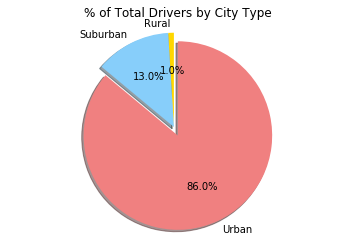

In [99]:
# calculate each ratio
type_percents = city_ride.groupby(["type"])["driver_count"].sum() / city_ride["driver_count"].sum()

# create Pie Chart
plt.pie(
    type_percents, 
    labels=["Rural", "Suburban", "Urban"], 
    colors=["gold", "lightskyblue", "lightcoral"], 
    explode=[0, 0, 0.1], 
    autopct='%1.1f%%', 
    shadow=True,
    startangle = 90
)

# graph settings
plt.title("% of Total Drivers by City Type")
plt.axis('equal')

plt.show()